In [1]:
import os
import pandas as pd
os.chdir('/Users/yehhsuan-yu/Umich/Stats503/project')
#os.chdir('/home/hsuanyu')
train = pd.read_csv('train.csv').fillna(' ')
test = pd.read_csv('test.csv').fillna(' ')

# CountVectorizer

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
df=train.append(test,ignore_index=True)
text=df["comment_text"]

word_vectorizer=CountVectorizer(
    #sublinear_tf=True,
    #strip_accents='unicode',
    analyzer='word',
    #token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=100)
# tokenize and build vocab
word_vectorizer.fit(text)


train_features = word_vectorizer.transform(train['comment_text'])
test_features=word_vectorizer.transform(test['comment_text'])
print(train_features.shape)

(8000, 100)


In [14]:
# KNN
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

myList = list(range(1,30))
neighbors = filter(lambda x: x%2 != 0, myList)
cv_scores = []
for k in neighbors:
    knn_count = KNeighborsClassifier(n_neighbors=k, n_jobs=4)
    scores = cross_val_score(knn_count, train_features.toarray(), np.array(train['toxic']), cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE_count = [1 - x for x in cv_scores]
neighbors = filter(lambda x: x%2 != 0, myList)
l = [i for i in neighbors]
optimal_k = l[MSE_count.index(min(MSE_count))]
print ("The optimal number of neighbors is %d" % optimal_k)
MSE_count_df = pd.DataFrame(MSE_count)
MSE_count_df.to_csv('/Users/yehhsuan-yu/Umich/Stats503/project/MSE_count.csv')

The optimal number of neighbors is 27


In [16]:
myList = list(range(1,30))
neighbors = filter(lambda x: x%2 != 0, myList)
l = [i for i in neighbors]
optimal_k = l[MSE_count.index(min(MSE_count))]
print ("The optimal number of neighbors is %d" % optimal_k)
MSE_count_df = pd.DataFrame(MSE_count)
MSE_count_df.to_csv('MSE_count.csv')
#predict_tfidf = knn_tfidf.predict(test_features_tfidf.toarray())
#predict_tfidf = np.array(predict_tfidf)
#print(sum(predict_tfidf == test['toxic'])/31915.0)

The optimal number of neighbors is 27


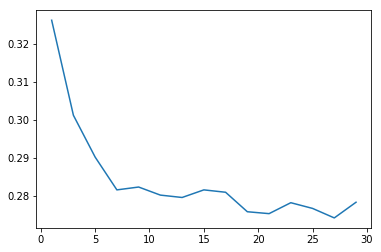

In [17]:
import matplotlib.pyplot as plt
plt.plot(l, MSE_count)
plt.show()

In [18]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.grid_search import GridSearchCV
knn_tfidf = KNeighborsClassifier(n_neighbors=27, n_jobs=4).fit(train_features.toarray(), np.array(train['toxic']))
predict_tfidf = knn_tfidf.predict(test_features.toarray())
predict_tfidf = np.array(predict_tfidf)
print(sum(predict_tfidf == test['toxic'])/2000.0)

0.737


# TfidfVectorizer

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
df=train.append(test,ignore_index=True)
text=df["comment_text"]

word_vectorizer_tfidf=TfidfVectorizer(
    sublinear_tf=True,
    #strip_accents='unicode',
    analyzer='word',
    #token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=100)
word_vectorizer_tfidf.fit(text)

train_features_tfidf = word_vectorizer_tfidf.transform(train['comment_text'])
test_features_tfidf = word_vectorizer_tfidf.transform(test['comment_text'])
print(train_features_tfidf.shape)

(8000, 100)


In [24]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

myList = list(range(1,30))
neighbors = filter(lambda x: x%2 != 0, myList)
cv_scores = []
for k in neighbors:
    knn_tfidf = KNeighborsClassifier(n_neighbors=k, n_jobs=4)
    scores = cross_val_score(knn_tfidf, train_features_tfidf.toarray(), np.array(train['toxic']), cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE_tfidf = [1 - x for x in cv_scores]
neighbors = filter(lambda x: x%2 != 0, myList)
l = [i for i in neighbors]
optimal_k = l[MSE_tfidf.index(min(MSE_tfidf))]
print ("The optimal number of neighbors is %d" % optimal_k)
MSE_tfidf_df = pd.DataFrame(MSE_tfidf)
MSE_tfidf_df.to_csv('/Users/yehhsuan-yu/Umich/Stats503/project/MSE_tfidf.csv')

The optimal number of neighbors is 17


In [25]:
myList = list(range(1,30))
neighbors = filter(lambda x: x%2 != 0, myList)
l = [i for i in neighbors]
optimal_k = l[MSE_tfidf.index(min(MSE_tfidf))]
print ("The optimal number of neighbors is %d" % optimal_k)
MSE_tfidf_df = pd.DataFrame(MSE_tfidf)
MSE_tfidf_df.to_csv('/Users/yehhsuan-yu/Umich/Stats503/project/MSE_tfidf.csv')
#predict_tfidf = knn_tfidf.predict(test_features_tfidf.toarray())
#predict_tfidf = np.array(predict_tfidf)
#print(sum(predict_tfidf == test['toxic'])/31915.0)

The optimal number of neighbors is 17


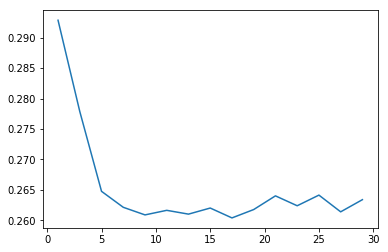

In [26]:
import matplotlib.pyplot as plt
plt.plot(l, MSE_tfidf)
plt.show()

In [27]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.grid_search import GridSearchCV
knn_tfidf = KNeighborsClassifier(n_neighbors=17, n_jobs=4).fit(train_features_tfidf.toarray(), np.array(train['toxic']))

In [28]:
predict_tfidf = knn_tfidf.predict(test_features_tfidf.toarray())
predict_tfidf = np.array(predict_tfidf)
print(sum(predict_tfidf == test['toxic'])/2000.0)

0.745
